# Stroop Effect Analysis
### Udacity Data Science Nanodegree Project 1
**Zach Dischner**

**Feb 13 2017**

## Background

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example <span style="color:red">RED</span>, <span style="color:blue">BLUE</span>. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example <span style="color:orange">PURPLE</span>, <span style="color:purple">ORANGE</span>. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.


### 1. What is our independent variable? What is our dependent variable?
**Independent**: Congruent/Incongruent word list to read. AKA are the words printed in the color that the word refers to, or are they printed in a color different than the word itself refers to. 

**Dependent**: Measure the time taken for a participent to read through a list and name ink colors that each word is printed in

### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

**Hypotheses**:
0. **$H_0$**: $\mu_{C} = \mu_{I}$
0. **$H_a$**: $\mu_{C} \neq \mu_{I}$

Where: 
* $H_0$ represents the null hypothesis
* $H_a$ represents the alternative hypotheses respectively
* $\mu_C$ represents the population average reading time for congruently colored words
* $\mu_I$ represents the population average reading time for incongruently colored words

In plain english, the null hypothesis claims that the average printed-color identification time for a list of congruently colored words will be statistically identical to the printed-color identification time of a like-sized list of incongruently colored words over the population. This hypothesis is framed such that if it is true, the independent variable (cogruency) has no significant effect on the dependent variable (color identification time). That is the effect that I will quantify and statistically (in)validate. 

**Test:** In order to *infer* the population parameters and accept/reject the null hypothesis from the samples provided, I will perform the the *paired t-test with significence $\alpha=0.05$* where $\alpha$ is the significance value. The test will definitively indicate with a single metric whether or not there is enough statistical evidence in the sample data to accept/reject the null hypothesis. 

The t-test is chosen because here, we are comparing two different sample means ($\bar{x}$) in order to infer population means ($\mu$). Specifically, the t-test is the right test in this case (as opposed to, say a z-test) because:
* The population parameters here are unknown
* The sample size is < 30
* I have made no assumptions about population normality

This test is a *paired* t-test because the same subject is being tested under two separate conditions. I am choosing a 2-tailed test here because, though (or because) I have an intuition as to how congruency will affect the outcome, I would like the test to be performed in an unbiased manner where I am not testing against an expected outcome at all. I am ready to be surprised.


Ref:
* http://support.minitab.com/en-us/minitab/17/topic-library/basic-statistics-and-graphs/hypothesis-tests/tests-of-means/types-of-t-tests/
* http://www.statisticshowto.com/when-to-use-a-t-score-vs-z-score/

## 3. Descriptive Statistics
Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.


In [1]:
%matplotlib inline
import pandas as pd

## Load downloaded dataset (https://www.google.com/url?q=https://drive.google.com/file/d/0B9Yf01UaIbUgQXpYb2NhZ29yX1U/view?usp%3Dsharing&sa=D&ust=1487281589913000&usg=AFQjCNEdqU1fG56BKsi3mR-fySVhIPhvBA)
df = pd.read_csv('stroopdata.csv')
print("Quick summary statistics:\n", df.describe())
print("\nScaled measure of spread (std/mean):\n", df.std()/df.mean())


Quick summary statistics:
        Congruent  Incongruent
count  24.000000    24.000000
mean   14.051125    22.015917
std     3.559358     4.797057
min     8.630000    15.687000
25%    11.895250    18.716750
50%    14.356500    21.017500
75%    16.200750    24.051500
max    22.328000    35.255000

Scaled measure of spread (std/mean):
 Congruent      0.253315
Incongruent    0.217890
dtype: float64


#### Central Tendency
* The **mean** reading time for congruent and incongruent word conditions is **14.05**s and **22.02**s, respectively. 
* The **median** reading time (50% quartile) is **14.36**s and **21.02**s, respectively.

#### Measure of Spread
* The **standard deviation** (measured for a sample, with degree of freedom=1) for the congruent and incongruent word conditions is **3.56**s and **4.80**s, respectively. 
* When scaled by the corresponding mean, the relative standard deviation of each dataset is **0.25**s and **0.22**s respectively

#### Takeaway
With both the mean and median values for each respective dataset being roughly equal, I would expect that the overall distribution should be roughly normal in shape. In addition, when each measure of spread is normalized by the mean value of the distribution, I found that the faux-normalized standard deviations are also roughly equal by first-order approximation. These two facts indicate that the distribution of congruent and incongruent word condition reading times are similarly shaped and distributed, whose values are different by a rough scale factor. 

## 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Raw histograms


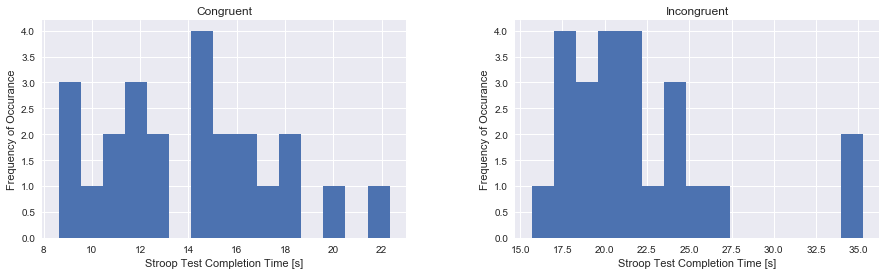

In [2]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

print("Raw histograms")
[[ax0,ax1]] = df.hist(bins=15, figsize=(15,4))
ax0.set_xlabel('Stroop Test Completion Time [s]')
ax1.set_xlabel('Stroop Test Completion Time [s]')
ax0.set_ylabel('Frequency of Occurance')
_ = ax1.set_ylabel('Frequency of Occurance')

Boxplot


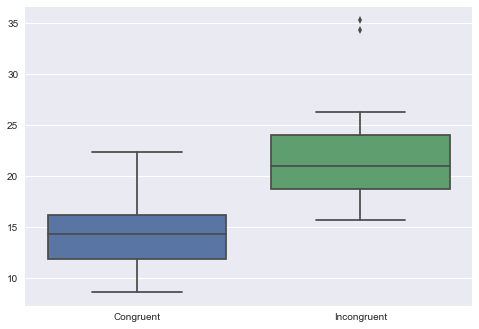

In [3]:
print("Boxplot")
plt.figure()
_ = sns.boxplot(data=df)

Distribution plot, normalized histogram with continuous distribution overlaid


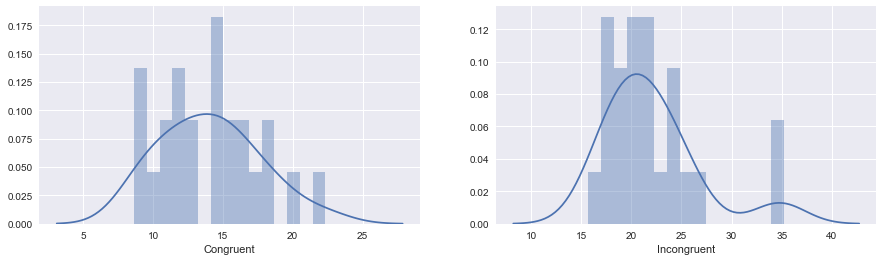

In [4]:
print("Distribution plot, normalized histogram with continuous distribution overlaid")
fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(121)
sns.distplot(df.Congruent, ax=ax1, bins=15,)

ax2 = fig.add_subplot(122)
_=sns.distplot(df.Incongruent, ax=ax2, bins=15)

#### Takeaway
The first histogram plots and boxplot tell a similar story. The granularity of insights here is rough due to the overall amount of data analyzed, so are to be taken with a grain of salt.
* The *Congruent* dataset has a fair amount of spread, enough that the distibution looks to me like one between a true normal and a uniform one. The minimum and maximum are spread farther from the median than the *Incongruent* set when comparing boxplots.
* A slight positive skew is evident in the *Congruent* dataset
* The *Incongruent* dataset appears to be much closer to normal, with the exception of two high-test-time outliers. This is evident in the boxplot, where the median is roughly equispaced from the 1st and 3rd quartiles, and the two outliers are far from the maximum whisker. 
* An alternative possibility for the outliers is suggested by the distribution plot of the *Incongruent* dataset. In this best fit, the distribution looks almost bi-modal. Statistically, the 30s+ comprehension times do indicate outliers and not a second mode, however the observation is worth noting. 


## 5. Now, perform the statistical test and report your results. 
* What is your confidence level and your critical statistic value? 
* Do you reject the null hypothesis or fail to reject it? 
* Come to a conclusion in terms of the experiment task. 
* Did the results match up with your expectations?

In [5]:
## Import Statistics module
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

## Define problem constraints/features
n = len(df)
dof = n - 1
alpha = 0.05
tails = 2

## Find t*
tcrit = st.t.ppf(alpha/tails, dof)
print(f"Critical 2-tail t-scores for alpha={alpha} with {dof} degrees of freedom = +- {tcrit}")

Critical 2-tail t-scores for alpha=0.05 with 23 degrees of freedom = +- -2.068657610419041


#### Test Summary
Test performed is a **two-sided** t-test with **95%** confidence level. Critical t-score is calcualted to be +- 2.0687

**t(23) = +-2.0687, p<0.05, two-tailed**

In [6]:
## Calculate mean difference between test conditions
df['difference'] = df['Incongruent'] - df['Congruent']
md = df['difference'].mean()

## Sampling Error
s_d = df['difference'].std(ddof=1)
se = s_d/np.sqrt(n)

## Calculate t-score
tscore = md/se
print(f"T-score for this Incongruent vs Congruent printing recognition: {tscore}")

# Second check
t,p = st.ttest_rel(df['Incongruent'],df['Congruent'])

T-score for this Incongruent vs Congruent printing recognition: 8.020706944109957


#### Results
With a calculated t-score of **8.021** and associated probability of **4.1e-8**, I am confident that the difference between Congruent and Incongruent reading times *is statistically significant*, therefore I will **Reject the null hypothesis**

**Reject Null Hypothesis: p(4.1e-8) < 0.05**

Visualizastion - the t-score clearly falls within the 'Reject Null Hypothesis' realm


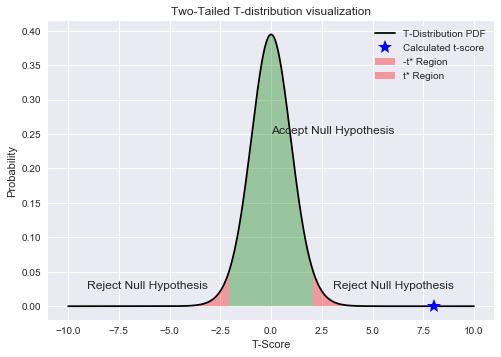

In [7]:
## Visualize against t distribution
plt.figure()
xs = np.linspace(-10,10,1000)
plt.plot(xs, st.t.pdf(xs,dof), 'k', label="T-Distribution PDF")

## 
# critline = np.linspace(0,alpha/2.0)
# plt.plot(len(ys1)*[tcrit], critline, 'r', label="-t* for dof=23")
# plt.plot(len(ys1)*[-tcrit], critline,'r', label="t* for dof=23")


plt.fill_between(x=np.linspace(-abs(tcrit), abs(tcrit)), 
                 y1=st.t.pdf(np.linspace(-abs(tcrit), abs(tcrit)),dof),
                 facecolor='green',
                 alpha=0.35)

# Critical regions
plt.fill_between(x=np.linspace(-10,-abs(tcrit)), 
                 y1=st.t.pdf(np.linspace(-10,-abs(tcrit)),dof),
                 facecolor='red',
                 alpha=0.35, label="-t* Region")

plt.fill_between(x=np.linspace(abs(tcrit), 10), 
                 y1= st.t.pdf(np.linspace(abs(tcrit),10),dof),
                 facecolor='red',
                 alpha=0.35,label="t* Region")

# Actual t score
plt.plot(tscore, p, 'b*',ms=15, label="Calculated t-score")

# Some text
plt.text(x=0, y=0.25, s="Accept Null Hypothesis")
plt.text(x=-abs(tcrit)-7, y=0.025, s= "Reject Null Hypothesis") 
plt.text(x=abs(tcrit)+1, y=0.025, s= "Reject Null Hypothesis") 

# Some labels
plt.xlabel("T-Score"); plt.ylabel("Probability"); plt.title("Two-Tailed T-distribution visualization"); plt.legend()
print("Visualizastion - the t-score clearly falls within the 'Reject Null Hypothesis' realm")

#### Conclusions
The results here are aligned with my original expectations and personal test results. The incongruent color readings took (statistically) significantly longer than the congruent printout. Even at significance level of alpha = 0.001 (t\*=3.76), the results hold up. I have full cofidence standing behind these findings. 

**Lurking Variables** Some thoughts on possible alternative causes for this behavior
* *Color-blindness*: Colorblind or partially colorblind subjects would have a hard time with the Incongruent test if they could not easily differentiate between the colors that the inks are printed in. Specifically, a small proportion of the test subjects had drastically longer comprehension times (the second 'hump' in the incongruent fit). There isn't enough data to tell if that behavior is significant, but still, it comes to mind. 
* *Native Language*: The test assumes comprehension of the words displayed, though an illiterate person could still complete this test, probably with no difference in reading times. Accounting for such by requiring a literacy/fluency level of participants would be a good way to mitigate that risk

## 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

Intuitively, I would expect contradictory information to confound many if not all test subjects. Congruent information gives the brain multiple avenues to come to the same conclusion. While incongruent information provides contradictions, both of which must be comprehended by the brain and then decided upon for correctness. 

Specific to this test, some possible underlying reasons for the difference in comprehension times are:
* Comprehension of words is naturally faster than of colors. So in the first test, participents are just reading words, while in the second they are processing colors, which the brain could do more slowly
* Predisposition to read words. We are trained through life to see words and automatically comprehend and associate meaning with them. Overriding this tendancy might be the cause of the longer comprehension in the incongruent test. 
* Non-autonomic responses are required in the Incongruent test, while in the Congruent test, a fully autonomous processing of *either* the color or the word displayed is sufficient to the task. Actively making decisions on what they were reading could be responsible for the delay. 
More discussion of possible causes can be found: http://www.wisegeek.org/what-is-the-stroop-effect.htm

Alternative/supplimental tests of ths phenomenon:
* *Shape incongruency*: Print words inside of the shapes they describe (circle, square, triange, etc) in the congruent test, then have the words and shapes be mismatched for the Incongruent test. This is a good alternative test that when paired with the original Stroop test could help in the understanding of whether or not word comprehension is the dominant mechanism here. 
* *Audible incongruency*: Test audio/visual incongruency by displaying an image of an animal while having a recorded naming of that animal, and have the subject name/make the sound made by the animal (testing not just repetition of wha is told, but the audio/visual association with animal traits). Repeat with incongruently displayed/spoken animals. 

In [ ]:
## Basic T-Distribution
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np

## Setup      
dof = 23        # Degrees of freedom
alpha = 0.05    # Significence level
ntails = 2      # Number of tails 

## Calculate critical t-score
tcrit = abs(st.t.ppf(alpha/ntails, dof))
# +=2.068

plt.figure()
xs = np.linspace(-10,10,1000)
plt.plot(xs, st.t.pdf(xs,dof), 'k', label="T-Distribution PDF")

## Plot some vertical lines representing critical t-score cutoff
critline = np.linspace(0,alpha/ntails)  # y range for critical line, AKA probability from 0-p*
xs_1 = len(critline) * [-tcrit]         # X ranges for plotting
xs_2 = len(critline) * [tcrit]
plt.plot(xs_1, critline, 'r', label="-t* for dof=23")
plt.plot(xs_2, critline,'r', label="t* for dof=23")
plt.vlines([-tcrit, tcrit], 0.0, st.t.pdf(tcrit,23), colors='r')

plt.legend()